<a href="https://colab.research.google.com/github/kenny08gt/lab3_algoritmos_ds/blob/master/lab3_Algoritmos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alan Hurtarte
## 19000590

---

## Laboratorio 3

---

(100, 1)
(1000, 1)
[2.14834777]


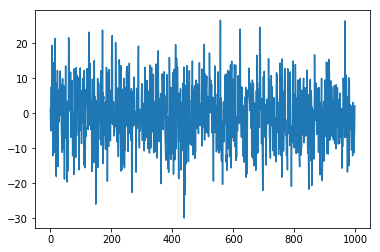

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(1)
d = 100 #cantidad de columnas para el dataset.
n = 1000 #cantidad de observaciones para el dataset.
X = np.random.normal(0,1, size=(n,d))
beta_true = np.random.normal(0,1, size=(d,1))
y = X.dot(beta_true) + np.random.normal(0,0.5,size=(n,1))
print(beta_true.shape)
print(y.shape)
print(y[-1])
plt.plot(y)

## Parte 1

In [0]:
beta_star = np.dot(np.dot(np.linalg.inv(np.dot(X.transpose(), X)), X.transpose()), y)
y_hat = np.dot(X, beta_star)
print(X.shape)
error = 0
for i in range(X.shape[0]):
  x = X[i]
  error_ = np.power(np.dot(beta_star.transpose(), x) - y, 2)
  error += error_[0]
error

(1000, 100)


array([76292.25999792])

### Conclusión
No se utiliza este método por el altisimo error que da. 1.34e15 es un numero demasiado grande para hacer estimaciones


## Parte 2

36572886.718983606
35835458.718176335
35512740.94147804


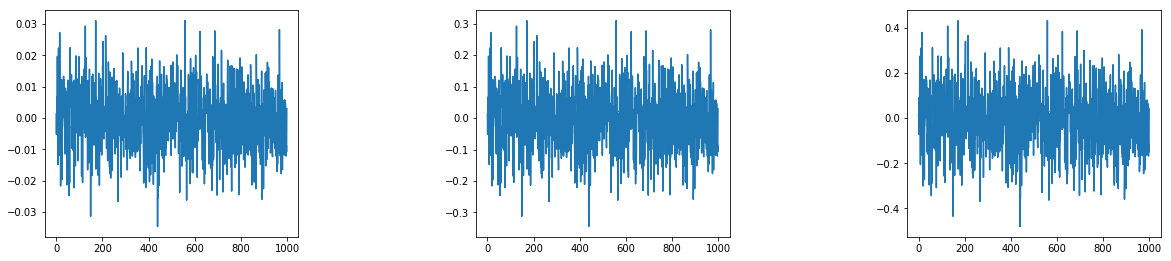

In [0]:
def gradientDescent(x, y, beta, learning_rate, iterations):
    
    m = len(y)
    i = 0
    cost_h = []
    while i < iterations:
      y_hat = np.dot(x, beta)
      beta = beta - (1/m)*learning_rate*(np.dot(x.transpose(), (y_hat - y)))
      cost = (1/2*m)*np.sum(np.square(y_hat - y))
      cost_h.append(cost)
      i += 1
      
    return beta, cost, y_hat, cost_h
  

beta = np.zeros((d,1))
beta_1, cost_h, y_hat1, cost_h1 = gradientDescent(X, y, beta, 0.00005, 20)
print(cost_h)

beta = np.zeros((d,1))
beta_2, cost_h, y_hat2, cost_h2 = gradientDescent(X, y, beta, 0.0005, 20)
print(cost_h)

beta = np.zeros((d,1))
beta_3, cost_h, y_hat3, cost_h3 = gradientDescent(X, y, beta, 0.0007, 20)
print(cost_h)

y_hats = np.array((y_hat1, y_hat2, y_hat3))

fig = plt.figure(figsize=(20,10))
fig.subplots_adjust(hspace=0.4, wspace=0.7)

for i in range(1, 4):
    plt.subplot(2, 3, i)
#     plt.ylim([, 5])
    plt.plot(range(0, len(y_hats[i -1])), y_hats[i - 1])

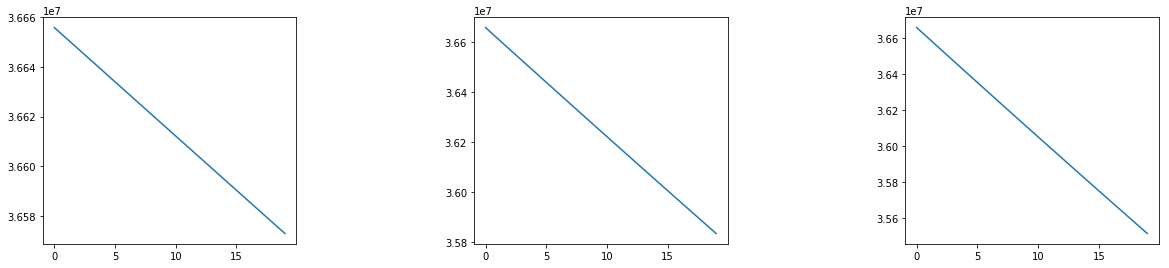

In [0]:
costs = np.array((cost_h1, cost_h2, cost_h3))

fig = plt.figure(figsize=(20,10))
fig.subplots_adjust(hspace=0.4, wspace=0.7)

for i in range(1, 4):
    plt.subplot(2, 3, i)
    plt.plot(range(0, len(costs[i -1])), costs[i - 1])

113328.05666912242


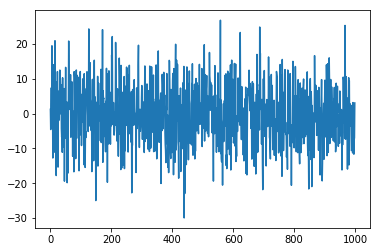

In [0]:
beta = np.zeros((d,1))
beta_1, cost_h, y_hat1, cost_h1 = gradientDescent(X, y, beta, 0.1, 100000)
print(cost_h)
plt.plot(range(0, len(y_hat1)), y_hat1)

### Conclusión
El mejor step size es el mas grande (0.0007) logrante un error menor que los demas, sin embargo el error sigue siendo demasiado grande como para tener significancia estadística.

Se probo con un step size grande y muchas mas iteraciones y no se logra bajar el error de 113328, el cual sigue siendo demasiado grande

Los step size tienen gran impacto en el resultado, se ve como mientras mas aumenta menor error obtenemos


## Parte 3

44.33728500320872
16.360506413495507
32.98453370183001


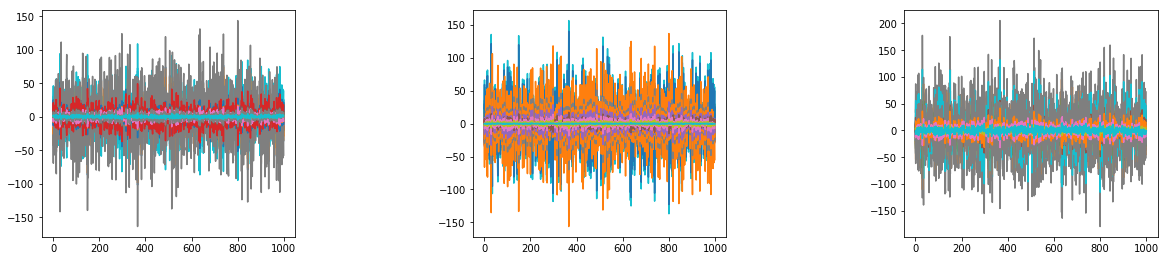

In [0]:
def stocasticGradientDescent(X, y, beta, learning_rate, iterations):
  i = 0
  cost_h = []
  m = len(y)
  indices = np.array(range(len(X)))
  for i in range(iterations):
    np.random.shuffle(indices)
    for j in range(len(X)):
      x = X[indices[j]]
      y_hat = np.dot(x, beta)
      beta = beta - learning_rate*(y_hat - y[indices[j]])*  x.T
      cost = (1/m)*np.sum(np.square(y_hat - y[indices[j]]))
        
    cost_h.append(cost)
  
  return beta, cost, (np.dot(X, beta)), cost_h

beta = np.zeros((d,1))
beta_1, cost_h, y_hat1, cost_h1 = stocasticGradientDescent(X, y, beta, 0.0005, 1000)
print(cost_h)

beta = np.zeros((d,1))
beta_2, cost_h, y_hat2, cost_h2 = stocasticGradientDescent(X, y, beta, 0.005, 1000)
print(cost_h)

beta = np.zeros((d,1))
beta_3, cost_h, y_hat3, cost_h3 = stocasticGradientDescent(X, y, beta, 0.01, 1000)
print(cost_h)

y_hats = np.array((y_hat1, y_hat2, y_hat3))

fig = plt.figure(figsize=(20,10))
fig.subplots_adjust(hspace=0.4, wspace=0.7)

for i in range(1, 4):
    plt.subplot(2, 3, i)
    plt.plot(range(0, len(y_hats[i -1])), y_hats[i - 1])

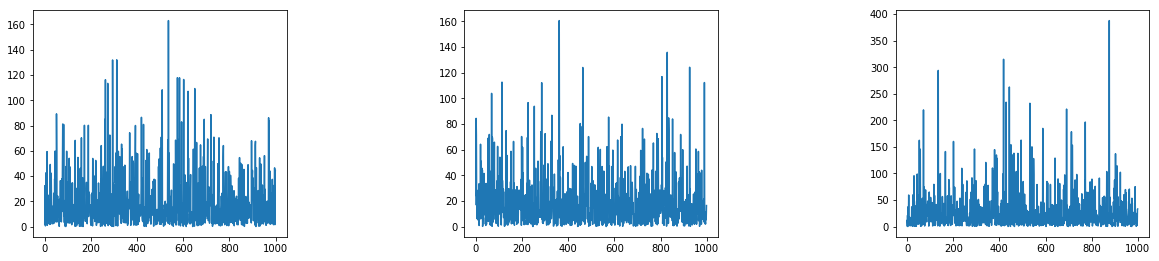

In [0]:
costs = np.array((cost_h1, cost_h2, cost_h3))

fig = plt.figure(figsize=(20,10))
fig.subplots_adjust(hspace=0.4, wspace=0.7)

for i in range(1, 4):
    plt.subplot(2, 3, i)
    plt.plot(range(0, len(costs[i -1])), costs[i - 1])

### Conclusión
EL step size afecta igual que en los otros metodos, depende mucho de como converge el método de este numero.

El que parece dar el mejor resultado es el 0.005, parece ser que el 0.01 es demasiado grande y el método no converge

## Parte 4

1.188963109977223
4.4000507782531395
6.397081794509858


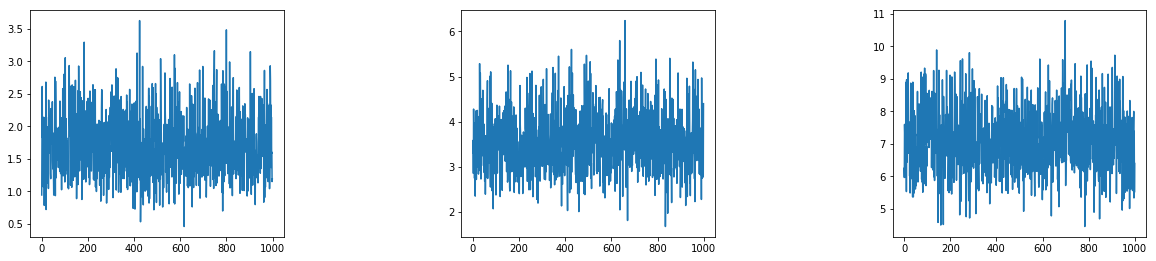

In [0]:
def BatchGradientDescent(X, y, beta, learning_rate, iterations, batch_size):
  i = 0
  cost_h = []
  m = len(y)
  indices = np.array(range(len(X)))
  for i in range(iterations):
    np.random.shuffle(indices)
    for j in range(len(X)):
      x = X[indices[0:batch_size]]
      y_hat = np.dot(x, beta)
      beta = beta - learning_rate*(1/batch_size)*np.sum(np.dot(x.T, (y_hat - y[indices[0:batch_size]])))
      cost = (1/m)*np.sum(np.square(y_hat - y[indices[0:batch_size]]))
        
    cost_h.append(cost)
  
  return beta, cost, (np.dot(X, beta)), cost_h

beta = np.zeros((d,1))
beta_1, cost_h, y_hat1, cost_h1 = BatchGradientDescent(X, y, beta, 0.0005, 1000, 25)
print(cost_h)

beta = np.zeros((d,1))
beta_2, cost_h, y_hat2, cost_h2 = BatchGradientDescent(X, y, beta, 0.0005, 1000, 50)
print(cost_h)

beta = np.zeros((d,1))
beta_3, cost_h, y_hat3, cost_h3 = BatchGradientDescent(X, y, beta, 0.0005, 1000, 100)
print(cost_h)

costs = np.array((cost_h1, cost_h2, cost_h3))

fig = plt.figure(figsize=(20,10))
fig.subplots_adjust(hspace=0.4, wspace=0.7)

for i in range(1, 4):
    plt.subplot(2, 3, i)
    plt.plot(range(0, len(costs[i -1])), costs[i - 1])

1.4420501557877554
3.688462273686338
6.754183876179403


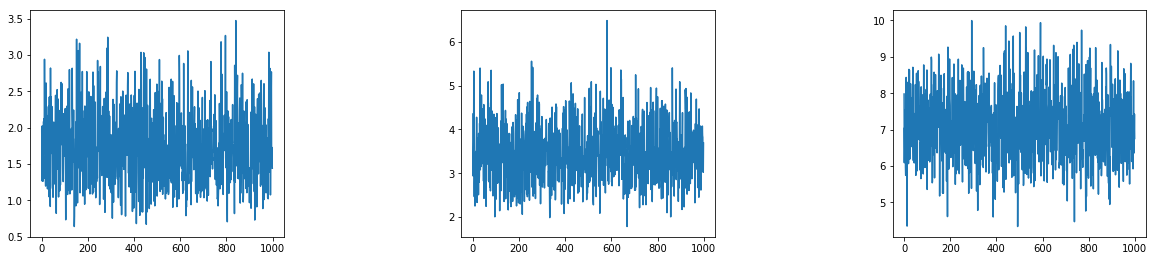

In [0]:
beta = np.zeros((d,1))
beta_1, cost_h, y_hat1, cost_h1 = BatchGradientDescent(X, y, beta, 0.005, 1000, 25)
print(cost_h)

beta = np.zeros((d,1))
beta_2, cost_h, y_hat2, cost_h2 = BatchGradientDescent(X, y, beta, 0.005, 1000, 50)
print(cost_h)

beta = np.zeros((d,1))
beta_3, cost_h, y_hat3, cost_h3 = BatchGradientDescent(X, y, beta, 0.005, 1000, 100)
print(cost_h)

costs = np.array((cost_h1, cost_h2, cost_h3))

fig = plt.figure(figsize=(20,10))
fig.subplots_adjust(hspace=0.4, wspace=0.7)

for i in range(1, 4):
    plt.subplot(2, 3, i)
    plt.plot(range(0, len(costs[i -1])), costs[i - 1])

2.6381125138424717
3.263935747978655
7.183087469943348


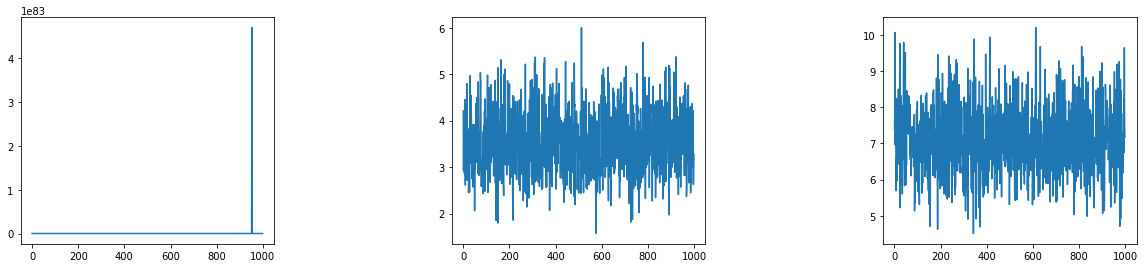

In [0]:
beta = np.zeros((d,1))
beta_1, cost_h, y_hat1, cost_h1 = BatchGradientDescent(X, y, beta, 0.01, 1000, 25)
print(cost_h)

beta = np.zeros((d,1))
beta_2, cost_h, y_hat2, cost_h2 = BatchGradientDescent(X, y, beta, 0.01, 1000, 50)
print(cost_h)

beta = np.zeros((d,1))
beta_3, cost_h, y_hat3, cost_h3 = BatchGradientDescent(X, y, beta, 0.01, 1000, 100)
print(cost_h)

costs = np.array((cost_h1, cost_h2, cost_h3))

fig = plt.figure(figsize=(20,10))
fig.subplots_adjust(hspace=0.4, wspace=0.7)

for i in range(1, 4):
    plt.subplot(2, 3, i)
    plt.plot(range(0, len(costs[i -1])), costs[i - 1])

0.2444410127166142


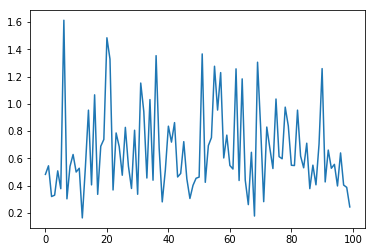

In [0]:
beta = np.zeros((d,1))
beta_1, cost_h, y_hat1, cost_h1 = BatchGradientDescent(X, y, beta, 0.0007, 100, 10)
print(cost_h)
plt.plot(range(0, len(cost_h1)), cost_h1)

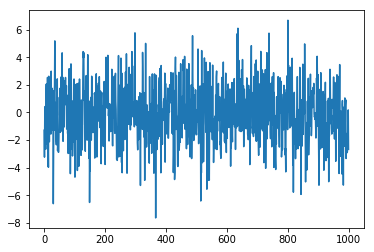

In [0]:
plt.plot(range(0, len(y_hat1)), y_hat1)

### Conclusión
El mejor resultado lo dio el step size 0.0005 con minibatch de 25.

Con minibatch de 25 parece tener una mejor convergencia en los tres diferentes step size.

Siguiendo esa hipotesis la prueba con un batch size menor se logro un menor error.

## Parte 5

| Método| Learning rate | Iteraciones | Error |
|---|---|---|---|
|MBGD (10) | 0.0007 | 100 | 0.24 |
|MBGD (25)|0.0005 | 1000| 1.19| 
|MBGD (25) | 0.005 | 1000 | 1.44|
|MBGD (25) | 0.01 | 1000 | 2.63 |
|MBGD (50) | 0.01 | 1000 | 3.26 |
|MBGD (50) | 0.005 | 1000 | 3.68 |
|MBGD (50) | 0.0005 | 1000 | 4.40 |
|MBGD (100) | 0.0005 | 1000 | 6.39 |
|MBGD (100) | 0.005 | 1000 | 6.75 |
|MBGD (100) | 0.01 | 1000 | 7.18 |
|SGD | 0.005 | 1000 | 16.36 |
|SGD | 0.01 | 1000 | 32.98 |
|SGD | 0.0005 | 1000 | 44.34 |
|Solución cerrada | NA | NA | 76292.26 |
|GD |0.01 | 20 | 35512740.94 |
|GD | 0.005 | 20 | 35835458.72 |
|GD | 0.0005 | 20 | 36572886.72 |



